<a href="https://colab.research.google.com/github/tarunkv169/Stock_price_prediction_using_fbprophet/blob/main/Stock_price_prediction_using_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###STOCK PRICE PREDICTION USING FACEBOOK PROPHET
In order to predict the price of Tesla 30 days in advance, this script tends to produce a Facebook Prophet Machine learning model.

    Importing all required libraries
    Importing the Yahoo Finance dataset
    Utilizing Plotly express for data visualisation
    Preparing Data for Modeling
    Creating Facebook Prophet Model
    Forecasting Stocks data for next 30 days
    Downlaoding the predicted data

###1. Importing all the necessary libraries
    import libraries ( pandas,fbprophet,ploty.express )
    initialize ploty.io

In [ ]:
!pip install prophet



In [2]:
import pandas as pd
from prophet import Prophet
import plotly.express as px
import plotly.io as pio

In [3]:
pio.renderers.default = "colab"

###2. Importing the dataset from Yahoo Finance
    download tsla stock dataset from yahoo finance
    import dataset using pandas,info,describe

In [4]:
df = pd.read_csv("TSLA.csv")

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-02,186.740005,193.750000,186.009995,190.899994,190.899994,181500700
1,2023-03-03,194.800003,200.479996,192.880005,197.789993,197.789993,154193300
2,2023-03-06,198.539993,198.600006,192.300003,193.809998,193.809998,128100100
3,2023-03-07,191.380005,194.199997,186.100006,187.710007,187.710007,148125800
4,2023-03-08,185.039993,186.500000,180.000000,182.000000,182.000000,151897800
...,...,...,...,...,...,...,...
247,2024-02-26,192.289993,201.779999,192.000000,199.399994,199.399994,111747100
248,2024-02-27,204.039993,205.600006,198.259995,199.729996,199.729996,108645400
249,2024-02-28,200.419998,205.300003,198.440002,202.039993,202.039993,99806200
250,2024-02-29,204.179993,205.279999,198.449997,201.880005,201.880005,85907000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,223.224921,227.465516,218.932341,223.347738,223.347738,1.234014e+08
std,34.446736,34.819594,33.926707,34.331953,34.331953,2.581572e+07
min,152.639999,160.479996,152.369995,153.750000,153.750000,6.512520e+07
25%,191.582497,195.149994,187.849995,191.479996,191.479996,1.046139e+08
50%,229.955002,235.364998,225.959999,232.120003,232.120003,1.194782e+08
75%,251.562496,257.977501,247.324993,252.699993,252.699993,1.364633e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,2.117971e+08


###3. data visualization using ploty
    px.area(df,x="date",y="Close")
    px.line(---)
    px.area(df,x="date",y="Volume")
    px.bar(df,y="Volume")
    px.box(df,y="Close")

In [8]:
px.area(df,x="Date",y="Close")

In [9]:
px.area(df,x="Date",y="Volume")

In [10]:
px.line(df,x="Date",y="Close")

In [11]:
px.bar(df,y="Volume")

In [12]:
px.box(df,y="Close")

###4. data preparing and preprocessing
    columns = ["date","Close"]
    ndf = pd.dataframe(df,columns=columns)
    prophet_df = ndf.rename(columns={"date":"ds","Close":"y"})

In [13]:
columns_needed_to_predict = ["Date","Close"]

In [14]:
ndf = pd.DataFrame(df,columns=columns_needed_to_predict)

In [15]:
ndf

,Date,Close
0,2023-03-02,190.899994
1,2023-03-03,197.789993
2,2023-03-06,193.809998
3,2023-03-07,187.710007
4,2023-03-08,182.000000
...,...,...
247,2024-02-26,199.399994
248,2024-02-27,199.729996
249,2024-02-28,202.039993
250,2024-02-29,201.880005


In [16]:
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})

###5. training of model
    m = Prophet()
    m.fit(prophet_df)

In [17]:
m = Prophet()

###6. prediction/forecasting
    future = m.make_future_dataframe(periods=30)
    forecast = m.predict(future)
    px.line(forecast,x="ds",y="yhat")
    fig = m.plot(forecast,xlabel="ds",ylabel="y")
    fig2 = m.plot_components(forecast)

In [ ]:
m.fit(prophet_df)

In [19]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-03-02,175.553134,147.920799,197.421731,175.553134,175.553134,-3.457895,-3.457895,-3.457895,-3.457895,-3.457895,-3.457895,0.0,0.0,0.0,172.095239
1,2023-03-03,175.828880,148.326877,195.805714,175.828880,175.828880,-3.303546,-3.303546,-3.303546,-3.303546,-3.303546,-3.303546,0.0,0.0,0.0,172.525334
2,2023-03-06,176.656118,149.178891,197.127353,176.656118,176.656118,-3.868331,-3.868331,-3.868331,-3.868331,-3.868331,-3.868331,0.0,0.0,0.0,172.787788
3,2023-03-07,176.931864,150.692935,199.739979,176.931864,176.931864,-1.502352,-1.502352,-1.502352,-1.502352,-1.502352,-1.502352,0.0,0.0,0.0,175.429512
4,2023-03-08,177.207610,149.195431,197.293179,177.207610,177.207610,-2.408892,-2.408892,-2.408892,-2.408892,-2.408892,-2.408892,0.0,0.0,0.0,174.798718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2024-03-27,187.494940,161.965358,208.379659,185.117862,189.825424,-2.408892,-2.408892,-2.408892,-2.408892,-2.408892,-2.408892,0.0,0.0,0.0,185.086048
278,2024-03-28,187.055285,161.199855,206.732840,184.553726,189.520308,-3.457895,-3.457895,-3.457895,-3.457895,-3.457895,-3.457895,0.0,0.0,0.0,183.597390
279,2024-03-29,186.615630,160.125582,207.698710,183.940728,189.239387,-3.303546,-3.303546,-3.303546,-3.303546,-3.303546,-3.303546,0.0,0.0,0.0,183.312084
280,2024-03-30,186.175976,167.872317,219.107153,183.374686,189.017650,7.270508,7.270508,7.270508,7.270508,7.270508,7.270508,0.0,0.0,0.0,193.446483


In [21]:
px.line(forecast,x="ds",y="yhat")

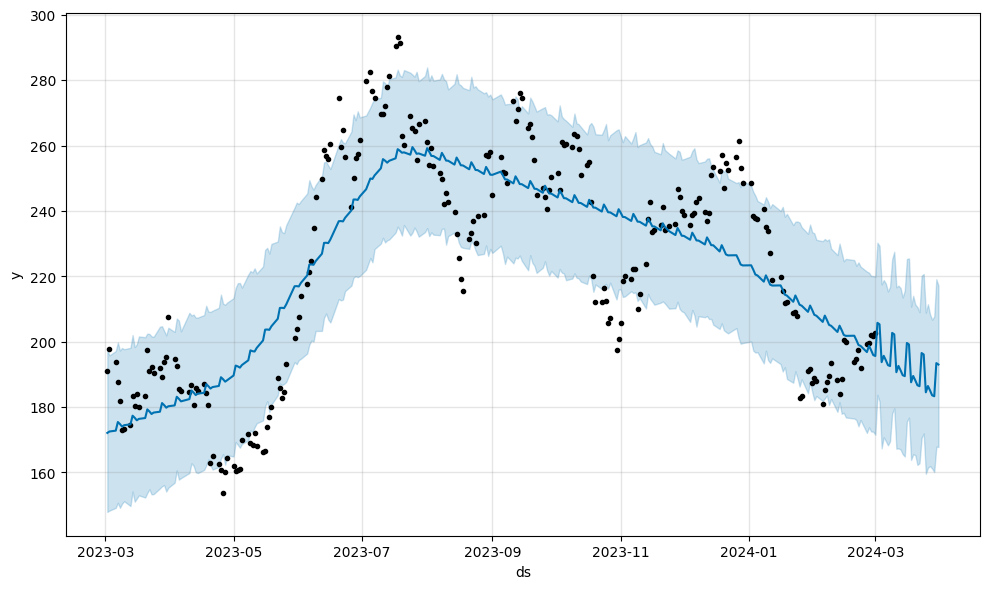

In [22]:
fig=m.plot(forecast,xlabel="ds",ylabel="y")

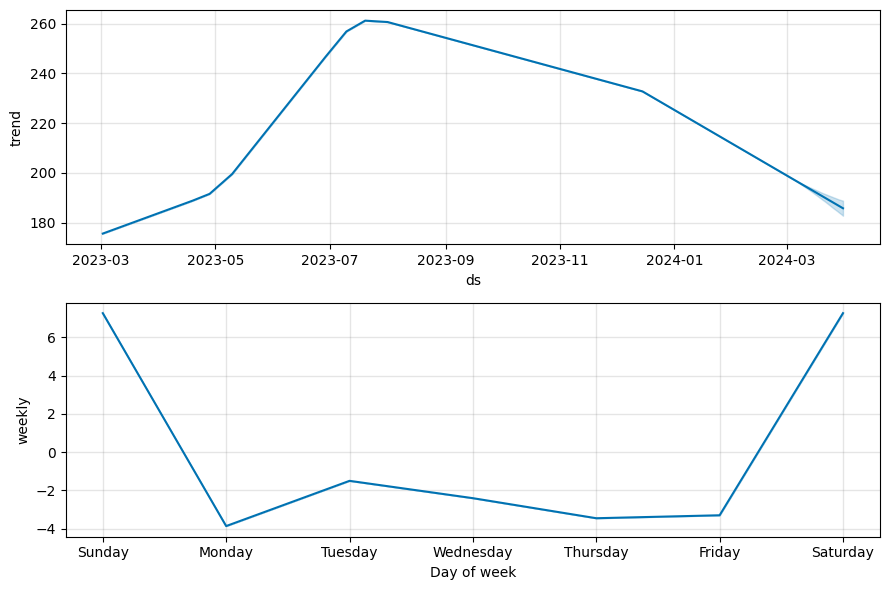

In [23]:
fig2=m.plot_components(forecast)

###7. Forecast Evaluation using Google Finance in Google Sheets
   ##download forecast as csv from google colab
    
    from google.colab import files
    forecast.to_csv('forecast.csv')
    files.download('forecast.csv')

    1.open google-sheets,open blank sheet
    2.enter in cell 'googlefinancial->put acc to suggested(ticker,price,startdate,enddate)-------->give us date+time & close of that ticker, from finance of google---->format the date+time to date
    3.import our downloaded csv-->took predicted(yhat) col---->add col next to google financed---->format the col to number
    4.select whole data and insert graph---> u will get actual and pred close
    5.took yhat last 30days --->again insert graph-->customize to data labels

In [24]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###8. Conclusion-  Stock Analysis of Tesla using Yahoo Finance
    1.analyse the terms of a ticker in yahoo finance

###9. Automating stock forecasting- for other stocks
    1.download other ticker stock dataset from yahoo finance
    2.make a copy of our colab_notebook-->put dataset where pd is reading
    3.when we run all code together we get our forecast file downloaded